In [ ]:
#https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119325-introduction-to-the-course
#From Analytics Vidhya: Loan DataSet
#Solving Binary Classification using Python


In [ ]:
#Steps Usually Involved:
#1. Problem Statmenet
#2. Hypothesis Generation
#3. Getting the system ready and loading the data
#4. Understanding the data
#5. Exploratory Data Analysis (EDA)
#5.1 Univariate Analysis
#5.2 Bivariate Analysis
#6. Missing value and outlier treatment
#7. Evaluation Metrics for classification problems
#8. Model Building : Part I
#9. Logistic Regression using stratified k-folds cross validation
#10. Feature Engineering
#11. Model Building : Part II
#11.1 Logistic Regression
#11.2 Decision tree
#11.3 Random Forest
#11.4 XGBoost

In [ ]:
#Problem statement:
#An Insurance Company has presence in both rural and urban areas
#Based on Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others
#Company validates using real time to approve or reject loan
#Those eligible, company should target those users only


In [ ]:
#Hypotheisis Generation
#Some of the factors affecting the loan status are:
#salary, previous history
#loan amount
#loan term
#EMI


In [33]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")


In [34]:
train = pd.read_csv("/Users/riteshtripathi/Desktop/R Class/train_loan_av.csv")
test = pd.read_csv("/Users/riteshtripathi/Desktop/R Class/test_loan_av.csv")

In [35]:
#Not a necessary step, but just for learning how to make copies
train_original=train.copy() 
test_original=test.copy()


In [36]:
#Now, Understanding our data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
test.columns#we have similar features in test data except of loan_status(this is our target variable)
#we will predict loan_status using train data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [38]:
#DataType for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#there are three data formats:
#1. Object: Variables are categorical
#2. Int64: Self Explanotary
#3. Float: Self Explanotary


In [39]:
#Lets look at the shape of dataset
train.shape, test.shape
#Train dataset has 614 rows and 13 columns, 
#Test dataset has 367 rows and 12 columns

((614, 13), (367, 12))

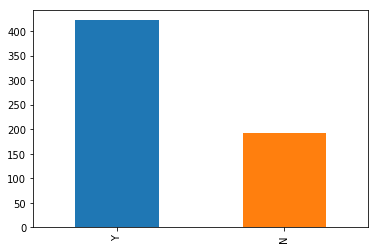

In [40]:
#Analysis ,UNIVARIATE ANALYSIS
#We will be examining individual variable
#For categorical features: we use frequency table or bar plots
#For numerical features: probabilty density plots
#Lets look at loan_status
train['Loan_Status'].value_counts()#where 422 loans were approved and 192 didnt
#lets look at the proportion instead of the numbers, how many defaulted and not defaulted
train['Loan_Status'].value_counts(normalize=True)#we normalize
#68% people approved
#31% didnt

#lets plot loan_status 
train['Loan_Status'].value_counts().plot.bar()

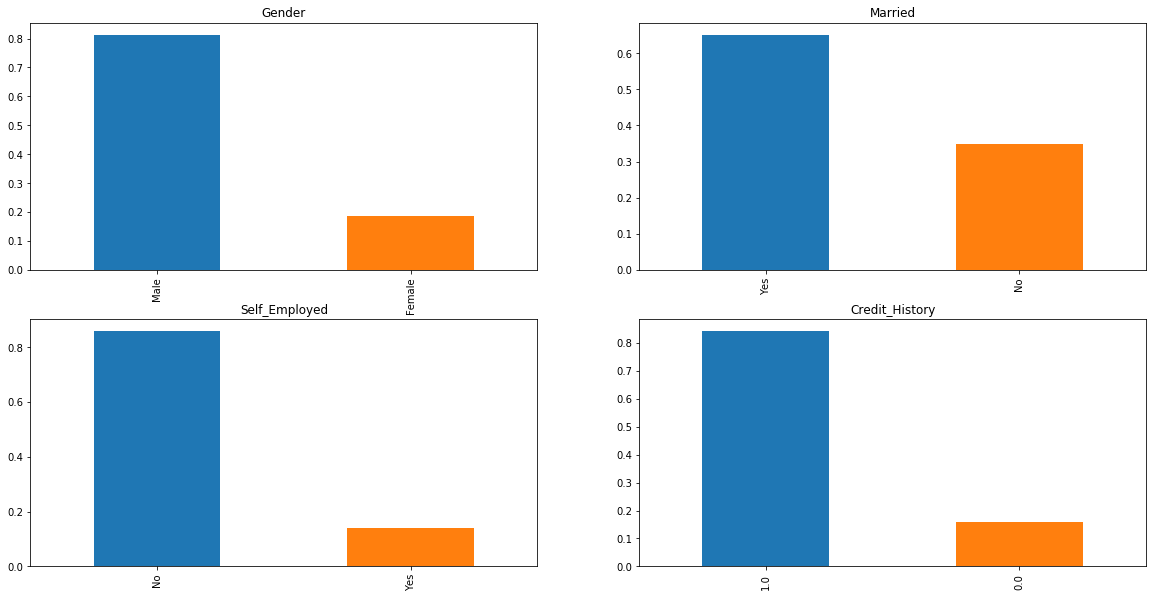

In [13]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

In [ ]:
#It can be seen from above that:
#1. 80% of applicants are male
#2.  65% of the applicants in the dataset are married.
#3. 15% applicants in the dataset are self employed
#4. 85% applicants have repaid their debts.

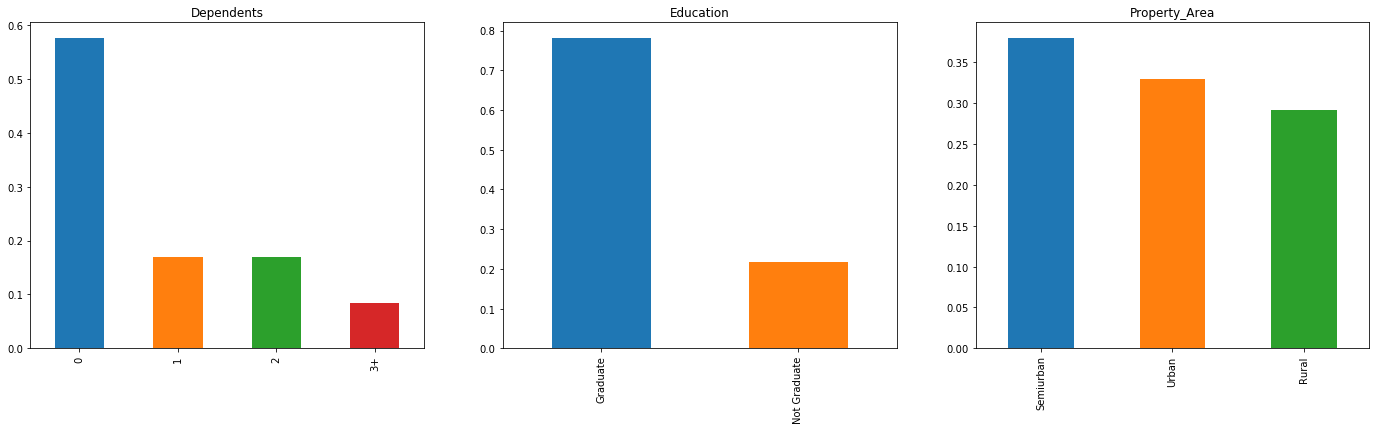

In [14]:
#Visualizing Ordinal Variables
plt.figure(1) 

plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

plt.show()

In [ ]:
#From above, it can be seen, 
#1. Most of the applicants don’t have any dependents.
#2. Around 80% of the applicants are Graduate.
#3. Most of the applicants are from Semiurban area

/Users/riteshtripathi/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


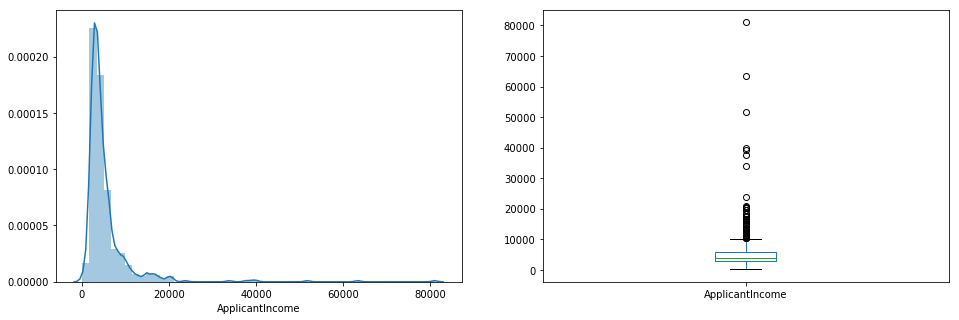

In [15]:
#Visualizing Numerical Variable
plt.figure(1) 

plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

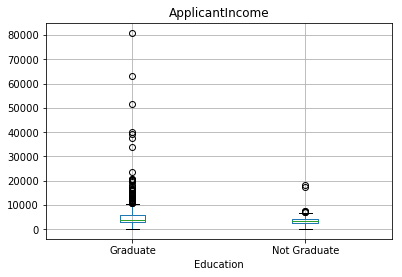

In [18]:
#the data is not normally distributed as shown above and the box plot confirms the existence of outliers
#as education is different and hence salary is differently shown

#Segregating them (Applicants) by Education
train.boxplot(column='ApplicantIncome', by = 'Education') 

plt.suptitle("")



In [ ]:
#it is clearly shown that graduates with higher salary/income as outliers

/Users/riteshtripathi/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


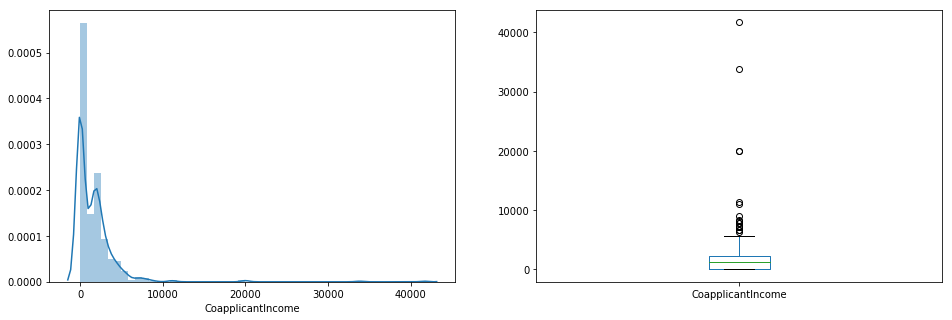

In [19]:
#Visualizing Coapplicants
plt.figure(1) 

plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 

plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

In [ ]:
#Most of the coapplicant's income ranges from 0 to 4,000 to 4,500 
#and the loan amount of coapplicants are not normally distributed
#Box plot shows many outliers, we will investigate later

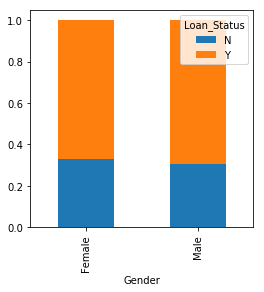

In [24]:
#Let's do BiVariate Analysis
#Let's explore the analysis done on univariate variables with respect to target variable (Loan_Status)
#Finding the approved and unapproved loans proportion
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))



In [ ]:
#It's seen from above that, 
#proportion of male and female applicants is more or less same for both approved and unapproved loans.

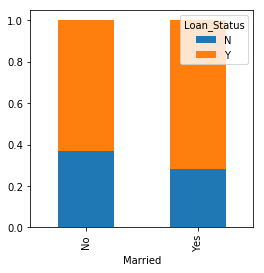

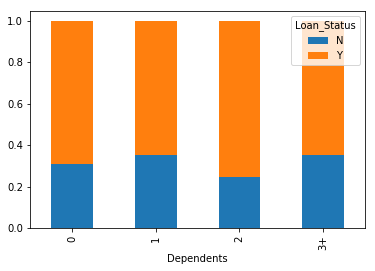

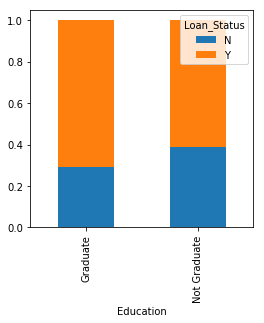

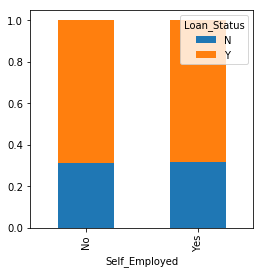

In [25]:
#Visualizing categorical variables vs target variable
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

In [ ]:
#it shows that: Proportion of married applicants is higher for the approved loans.
#Distribution of applicants with 1 or more dependents, is similar across both the categories of Loan_Status.
#There is nothing that we can infer when compared to Self_Employed vs Loan_Status plot.

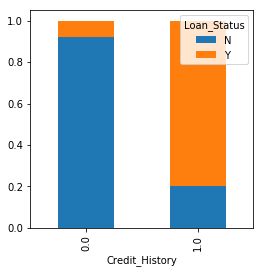

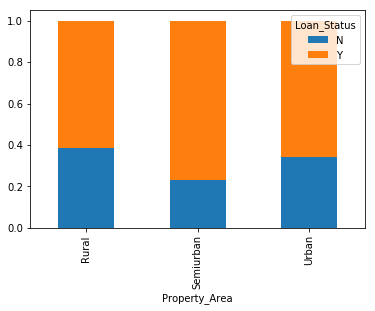

In [26]:
#categorical independent variables and Loan_Status
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


In [ ]:
#It looks like, applicants whose credit history are as 1, are more likely to get their loans approved
#Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban area


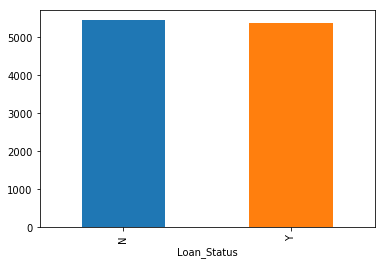

In [27]:
#Visualizing Numerical Independent Variables with target variable
#Let's find the mean income of people for which the loan has been approved vs... 
#the mean income of people for which the loan has not been approved
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [ ]:
#Y-axis is the mean income of the applicants with almost no changes, to analyse further, 
#lets divide the income in different bins as low, average, high, very high

In [31]:
!conda install -c conda-forge python-graphviz -y

/bin/sh: conda: command not found


In [32]:
import graphviz